In [36]:
import pandas as pd
import plotly as ply
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as stats
import numpy as np 


df = pd.read_csv("https://raw.githubusercontent.com/devtlv/MiniProject-DataAnalysis-W6D5-Apple_Stock_Data/main/AAPL%2C%201D%2001012007-12072023.csv")

In [37]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [38]:
df.isnull().sum()

volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [40]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [41]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


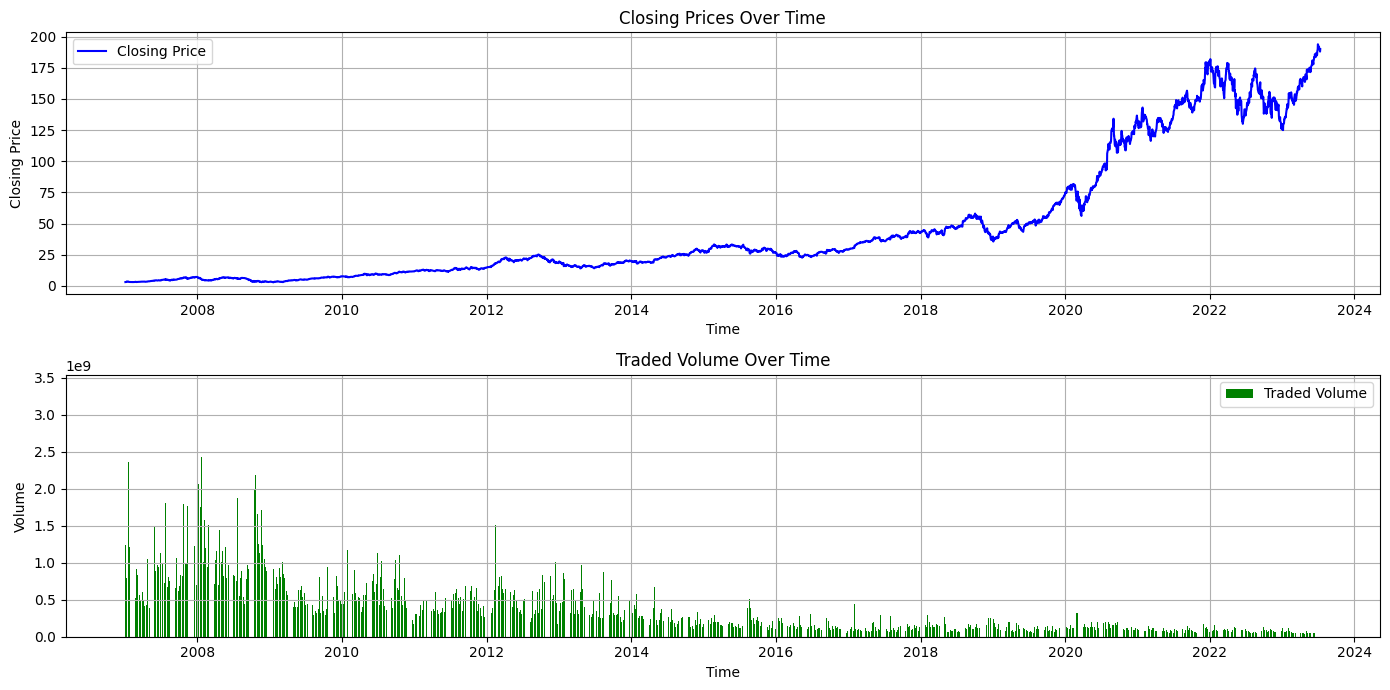

In [42]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(df['time'], df['close'], label='Closing Price', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=0)  # Rotating the x-axis labels to make them more readable
plt.grid(True)
plt.legend()

# Plotting Traded Volume over Time
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.bar(df['time'], df['volume'], label='Traded Volume', color='green')
plt.title('Traded Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.xticks(rotation=0)  # Rotating the x-axis labels to make them more readable
plt.grid(True)
plt.legend()

plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()

In [43]:
import plotly.graph_objects as go

# Assuming your DataFrame is named df and it includes the necessary columns

fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.update_layout(title='High and Low Prices Candlestick Chart',
                  xaxis_title='Time',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)  # Hides the range slider for a cleaner look
                 

fig.show()



In [44]:
# Summary statistics
print('Summary statistics:')
df.describe().transpose()

Summary statistics:


,count,mean,min,25%,50%,75%,max,std
volume,4159.0,366292450.046886,24222338.0,106749695.5,213646276.0,496532070.0,3373042176.0,372479281.052082
vwap,4159.0,46.391382,2.841,11.9362,25.8852,52.15415,193.102,50.277557
open,4159.0,46.362788,2.8354,11.9557,25.775,52.26375,193.78,50.235593
close,4159.0,46.396058,2.7929,11.94715,25.825,52.23125,193.97,50.293482
high,4159.0,46.881127,2.9286,12.0284,26.2628,52.62625,194.48,50.843874
low,4159.0,45.86579,2.7929,11.8536,25.68,51.79625,191.76,49.680104
time,4159,2015-04-06 10:13:19.807646208,2007-01-03 05:00:00,2011-02-16 17:00:00,2015-04-08 04:00:00,2019-05-23 16:00:00,2023-07-12 04:00:00,NaN
transactions,4159.0,270931.774465,30487.0,112815.0,178246.0,325955.5,2966979.0,251085.854744


In [45]:
df['moving__avg_close'] = df['close'].rolling(window=30).mean()
rolling_mean = df['close'].rolling(window=30).mean()
print("Rolling Mean:\n", rolling_mean)

Rolling Mean:
 0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4154    183.049333
4155    183.686667
4156    184.245667
4157    184.748667
4158    185.234663
Name: close, Length: 4159, dtype: float64


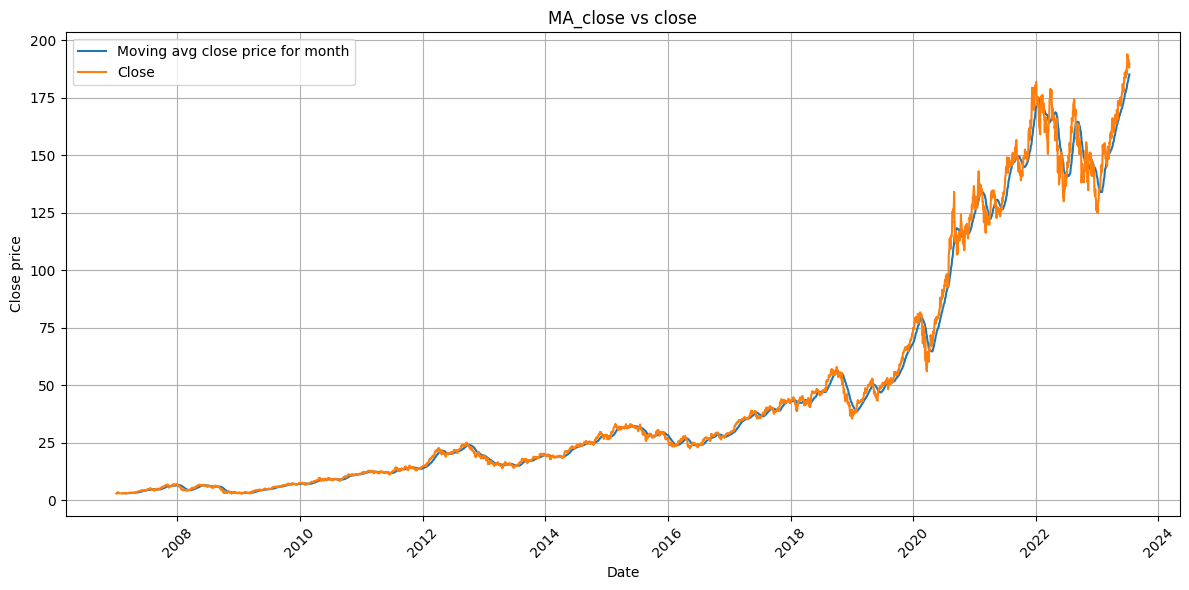

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['moving__avg_close'], label='Moving avg close price for month')
plt.plot(df['time'], df['close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('MA_close vs close')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

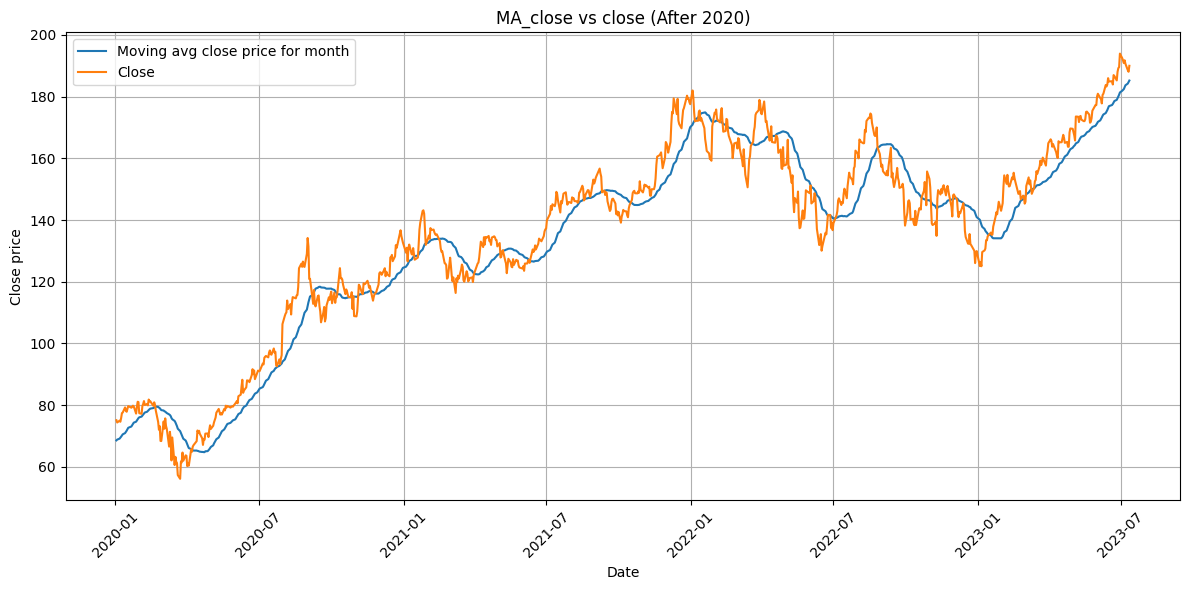

In [47]:
df_after_2020 = df[df['time'].dt.year >= 2020]

plt.figure(figsize=(12, 6))
plt.plot(df_after_2020['time'], df_after_2020['moving__avg_close'], label='Moving avg close price for month')
plt.plot(df_after_2020['time'], df_after_2020['close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close price')
plt.title('MA_close vs close (After 2020)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
df['time'].min()

Timestamp('2007-01-03 05:00:00')

In [49]:
df['time'].max()

Timestamp('2023-07-12 04:00:00')

In [61]:
avg_close_2007 = df[df['time'].dt.year == 2007]['close']
avg_close_2008 = df[df['time'].dt.year == 2008]['close']
avg_close_2009 = df[df['time'].dt.year == 2009]['close']
avg_close_2010 = df[df['time'].dt.year == 2010]['close']
avg_close_2011 = df[df['time'].dt.year == 2011]['close']
avg_close_2012 = df[df['time'].dt.year == 2012]['close']
avg_close_2013 = df[df['time'].dt.year == 2013]['close']
avg_close_2014 = df[df['time'].dt.year == 2014]['close']
avg_close_2015 = df[df['time'].dt.year == 2015]['close']
avg_close_2016 = df[df['time'].dt.year == 2016]['close']
avg_close_2017 = df[df['time'].dt.year == 2017]['close']
avg_close_2018 = df[df['time'].dt.year == 2018]['close']
avg_close_2019 = df[df['time'].dt.year == 2019]['close']
avg_close_2020 = df[df['time'].dt.year == 2020]['close']
avg_close_2021 = df[df['time'].dt.year == 2021]['close']
avg_close_2022 = df[df['time'].dt.year == 2022]['close']
avg_close_2023 = df[df['time'].dt.year == 2023]['close']


In [64]:
def check_diff_t_test(year1,year2):
    avg_close_for_y1 = df[df['time'].dt.year == year1]['close']
    avg_close_for_y2 = df[df['time'].dt.year == year2]['close']
    t_statistic, p_value = stats.ttest_ind(avg_close_for_y1,avg_close_for_y2)
    print(f"T-test for average closing prices between {year1} and {year2}:")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"The difference in average closing prices for year {year1} and {year2} is statistically significant.\n")
    else:
        print(f"The difference in average closing prices for year {year1} and {year2} is not statistically significant.\n")
    return  t_statistic, p_value

In [67]:
def get_t_test_values(year1,year2):
    avg_close_for_y1 = df[df['time'].dt.year == year1]['close']
    avg_close_for_y2 = df[df['time'].dt.year == year2]['close']
    t_statistic, p_value = stats.ttest_ind(avg_close_for_y1,avg_close_for_y2)
    return  t_statistic, p_value

In [65]:
check_diff_t_test(2007,2010)

T-test for average closing prices between 2007 and 2010:
T-statistic: -40.50613794484018
P-value: 3.641817808424702e-160
The difference in average closing prices for year 2007 and 2010 is statistically significant.



In [68]:
significant_difference = {}

for year in range(2007,2024):
    year1 = year
    year2 = year + 1
    t_statistic, p_value = get_t_test_values(year1,year2)
    if p_value < 0.05:
        key = f"{year1}-{year2}"
        significant_difference[key] = (t_statistic, p_value,True)
        
    else:
        key = f"{year1}-{year2}"
        significant_difference[key] = (t_statistic, p_value,False)

T-stat between 2007 and 2008:

T-stat between 2008 and 2009:

T-stat between 2009 and 2010:

T-stat between 2010 and 2011:

T-stat between 2011 and 2012:

T-stat between 2012 and 2013:

T-stat between 2013 and 2014:

T-stat between 2014 and 2015:

T-stat between 2015 and 2016:

T-stat between 2016 and 2017:

T-stat between 2017 and 2018:

T-stat between 2018 and 2019:

T-stat between 2019 and 2020:

T-stat between 2020 and 2021:

T-stat between 2021 and 2022:

T-stat between 2022 and 2023:

T-stat between 2023 and 2024:



In [85]:
df_significant_difference = pd.DataFrame.from_dict(significant_difference, orient='index', columns=['t_statistic', 'p_value', 'significant'])

# Print the DataFrame

In [86]:
df_significant_difference

,t_statistic,p_value,significant
2007-2008,-4.461286,1.006375e-05,True
2008-2009,-1.471032,1.419079e-01,False
2009-2010,-32.782459,7.525529e-127,True
2010-2011,-36.229467,3.511888e-142,True
2011-2012,-46.845318,5.250699e-185,True
2012-2013,20.335857,1.918964e-67,True
2013-2014,-26.489330,2.167145e-97,True
2014-2015,-28.591097,2.054705e-107,True
2015-2016,22.613444,1.343171e-78,True
2016-2017,-44.193726,5.535462e-175,True


In [87]:
df_significant_difference.drop(df_significant_difference.tail(1).index, inplace=True)

In [88]:
df_significant_difference

,t_statistic,p_value,significant
2007-2008,-4.461286,1.006375e-05,True
2008-2009,-1.471032,1.419079e-01,False
2009-2010,-32.782459,7.525529e-127,True
2010-2011,-36.229467,3.511888e-142,True
2011-2012,-46.845318,5.250699e-185,True
2012-2013,20.335857,1.918964e-67,True
2013-2014,-26.489330,2.167145e-97,True
2014-2015,-28.591097,2.054705e-107,True
2015-2016,22.613444,1.343171e-78,True
2016-2017,-44.193726,5.535462e-175,True


In [89]:
df

,volume,vwap,open,close,high,low,time,transactions,moving__avg_close
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,NaN
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,NaN
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,NaN
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,NaN
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,NaN
...,...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,2023-07-06 04:00:00,562755,183.049333
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,2023-07-07 04:00:00,538826,183.686667
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,2023-07-10 04:00:00,736912,184.245667
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,2023-07-11 04:00:00,577717,184.748667


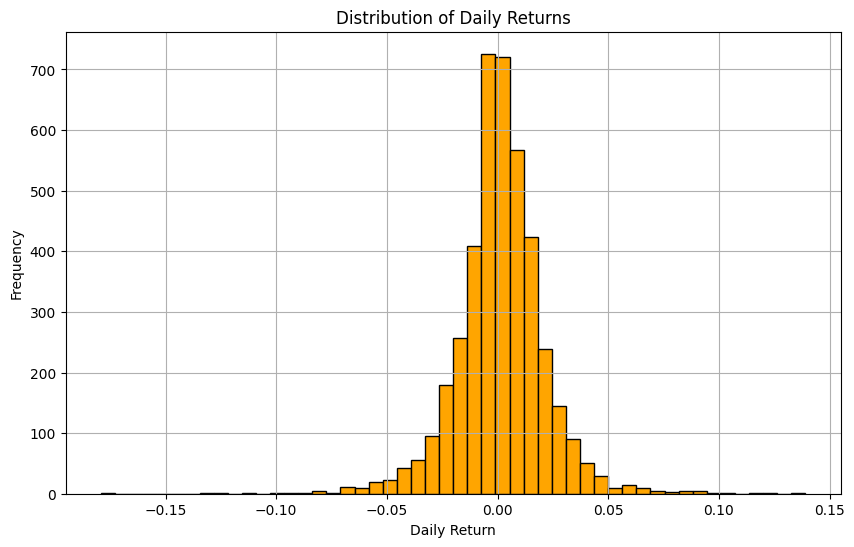

Shapiro-Wilk test for normality:
Statistic: 0.940666076855671
p-value: 6.180858977992611e-38
The distribution of daily returns is not normal.


In [92]:
import scipy.stats as stats

# Step 1: Calculate daily returns
df['daily_return'] = df['close'].pct_change()

# Step 2: Plot histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(df['daily_return'].dropna(), bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Test for normality using Shapiro-Wilk test
statistic, p_value = stats.shapiro(df['daily_return'].dropna())
print("Shapiro-Wilk test for normality:")
print("Statistic:", statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("The distribution of daily returns is not normal.")
else:
    print("The distribution of daily returns is normal.")


Advanced Statistical Techniques (Bonus)

In [99]:
type(df['moving__avg_close'][0])


pandas.core.series.Series

In [101]:
type(df['time'][0])

pandas._libs.tslibs.timestamps.Timestamp

Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
- E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
- Analyze correlations between moving averages of closing prices and trading volume across time periods.


In [111]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

df['moving__avg_close'] = df['close'].rolling(window=7).mean()
df['moving_avg_volume'] = df['volume'].rolling(window=7).mean()

corr, _ = pearsonr(df['moving__avg_close'].dropna(), df['moving_avg_volume'].dropna())
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: -0.56


In [112]:
corr, _ = spearmanr(df['moving__avg_close'].dropna(), df['moving_avg_volume'].dropna())
print(f'Spearman Rank Correlation: {corr:.2f}')

Spearman Rank Correlation: -0.90


The higher the closing price, the lower the trading volume.
--

In [116]:
# Calculate moving averages for closing prices and trading volume
window_size = 7
moving_avg_close = np.convolve(df['close'], np.ones(window_size)/window_size, mode='valid')
moving_avg_volume = np.convolve(df['volume'], np.ones(window_size)/window_size, mode='valid')


# Calculate correlation coefficient using np.corrcoef
correlation_matrix = np.corrcoef(moving_avg_close, moving_avg_volume)

# Print correlation coefficient
print("Correlation coefficient between moving averages of closing prices and trading volume:")
print(correlation_matrix[0, 1])

Correlation coefficient between moving averages of closing prices and trading volume:
-0.5557759831543406


**Insights from Advanced Statistical Analysis:**

1. **Moving Average Analysis:**

   - The code calculates moving averages for both closing prices and trading volume using a 7-day window.
   - This analysis helps smooth out short-term fluctuations and reveal underlying trends.

2. **Correlation Analysis:**

   - The code calculates both Pearson correlation coefficient and Spearman rank correlation coefficient between the moving averages of closing prices and trading volume.
   - The Pearson correlation coefficient of -0.56 indicates a moderate negative linear relationship, meaning that as the moving average of closing prices increases, the moving average of trading volume tends to decrease.
   - The Spearman rank correlation coefficient of -0.9 confirms this negative relationship, suggesting that the ranks of the moving averages of closing prices and trading volume tend to move in opposite directions.

3. **Interpretation:**

   - These findings suggest that periods of higher closing prices are associated with lower trading volume, and vice versa.
   - This could be due to various factors, such as increased investor confidence during periods of rising prices, leading to less selling and lower trading activity.
   - Further analysis could explore potential causes and implications of this relationship.

**Additional Insights:**

- The code utilizes NumPy's `convolve` function for calculating moving averages, demonstrating the application of advanced statistical functions for financial data analysis.
- The code also performs Shapiro-Wilk normality test on the daily returns, providing insights into the distribution of the data.

**Overall, the advanced statistical analysis in the code reveals valuable insights into the relationships between closing prices and trading volume of the Apple stock, highlighting potential patterns and areas for further investigation.**